In [1]:
from MNIST_class_helper import *
from MNIST_class_net import *

Training set size: 54000
Validation set size: 6000
Test set size: 10000
Epoch 1/10:
Train Loss: 0.1827, Train Acc: 94.39%
Val Loss: 0.0766, Val Acc: 97.67%

Epoch 2/10:
Train Loss: 0.0541, Train Acc: 98.31%
Val Loss: 0.0435, Val Acc: 98.72%

Epoch 3/10:
Train Loss: 0.0368, Train Acc: 98.84%
Val Loss: 0.0488, Val Acc: 98.37%

Epoch 4/10:
Train Loss: 0.0289, Train Acc: 99.12%
Val Loss: 0.0404, Val Acc: 98.72%

Epoch 5/10:
Train Loss: 0.0220, Train Acc: 99.37%
Val Loss: 0.0399, Val Acc: 98.82%

Epoch 6/10:
Train Loss: 0.0185, Train Acc: 99.44%
Val Loss: 0.0634, Val Acc: 98.25%

Epoch 7/10:
Train Loss: 0.0167, Train Acc: 99.42%
Val Loss: 0.0411, Val Acc: 98.90%

Epoch 8/10:
Train Loss: 0.0125, Train Acc: 99.61%
Val Loss: 0.0421, Val Acc: 98.92%

Epoch 9/10:
Train Loss: 0.0112, Train Acc: 99.63%
Val Loss: 0.0412, Val Acc: 98.95%

Epoch 10/10:
Train Loss: 0.0106, Train Acc: 99.64%
Val Loss: 0.0485, Val Acc: 98.83%


Final Test Accuracy: 98.98%


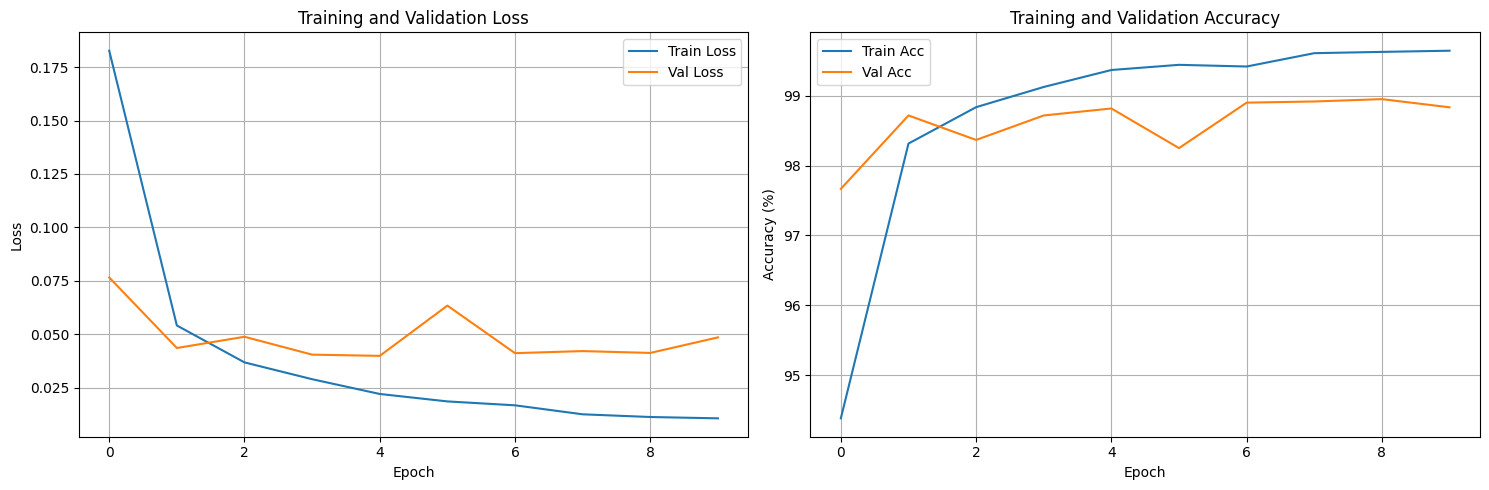

In [2]:
# Create data loaders with desired batch size
batch_size = 64
train_loader, val_loader, test_loader = create_data_loaders(batch_size=batch_size)

# Print dataset sizes
print(f"Training set size: {len(train_dataset)}")
print(f"Validation set size: {len(val_dataset)}")
print(f"Test set size: {len(test_dataset)}")

# Setup model and training parameters
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = EmbedMNISTNet().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
metrics = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    num_epochs=10,
    device=device
)

# Evaluate on test set
test_loss, test_acc = evaluate(model, test_loader, criterion, device)
print(f"\nFinal Test Accuracy: {test_acc:.2f}%")

# Plot training history
plot_metrics(metrics)

In [3]:
# Analyze model structure
visualize_network_structure(model)

Network Structure:
--------------------------------------------------

Feature Extraction:
Conv2d          Output shape: torch.Size([1, 32, 26, 26])
ReLU            Output shape: torch.Size([1, 32, 26, 26])
MaxPool2d       Output shape: torch.Size([1, 32, 13, 13])
Conv2d          Output shape: torch.Size([1, 64, 11, 11])
ReLU            Output shape: torch.Size([1, 64, 11, 11])
MaxPool2d       Output shape: torch.Size([1, 64, 5, 5])
Flatten         Output shape: torch.Size([1, 1600])

Embedding Layer:
Linear          Output shape: torch.Size([1, 64])
ReLU            Output shape: torch.Size([1, 64])

Classification Head:
Linear          Output shape: torch.Size([1, 128])
ReLU            Output shape: torch.Size([1, 128])
Linear          Output shape: torch.Size([1, 10])

Model Summary:
Total parameters: 130,890
Trainable parameters: 130,890


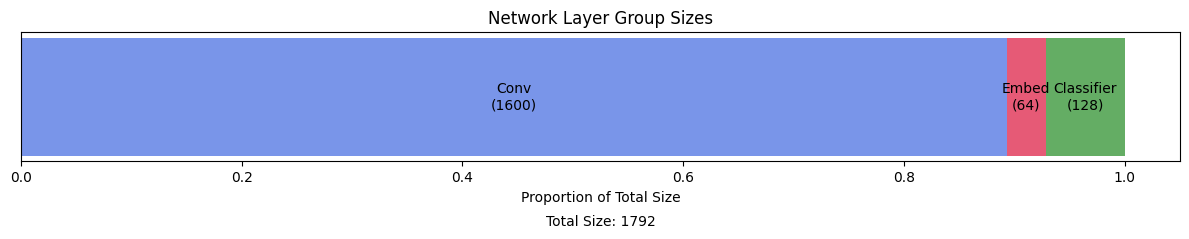


Layer Group Sizes:
Convolution features: 1600
Embedding: 64
Classifier hidden: 128
Total size: 1792


In [4]:
visualize_layer_sizes(model)

In [5]:
# Use with CUDA if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
inputs, activations, outputs = collect_activations_embed(model, train_loader, device)

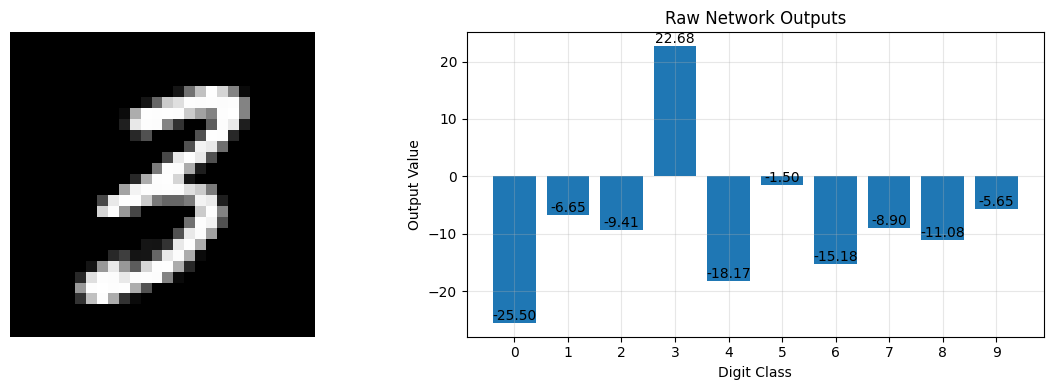

In [6]:
# Get random example from test set
new_input, new_activations, new_output, label = collect_single_example_activations_embed(model, val_loader, device=device)
# Show raw outputs
visualize_result(image=new_input, output=new_output)

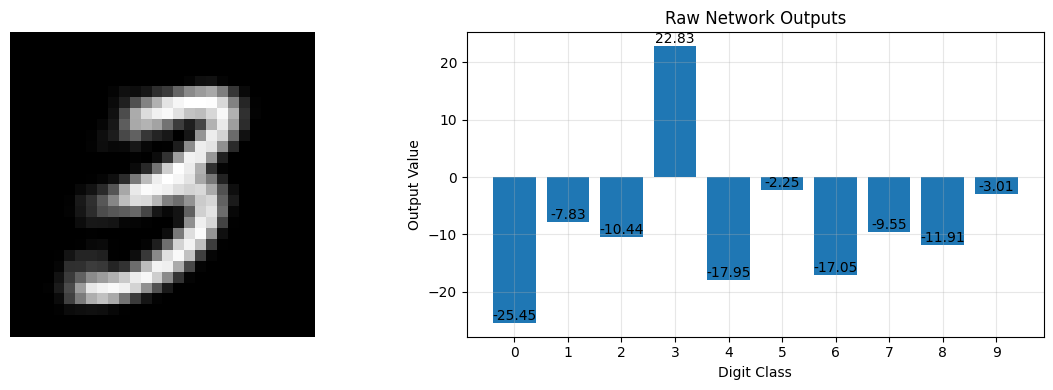

Input distance: 10.0337
Activation distance: 103.1681
Output distance: 3.8365
combined distance: 117.0383


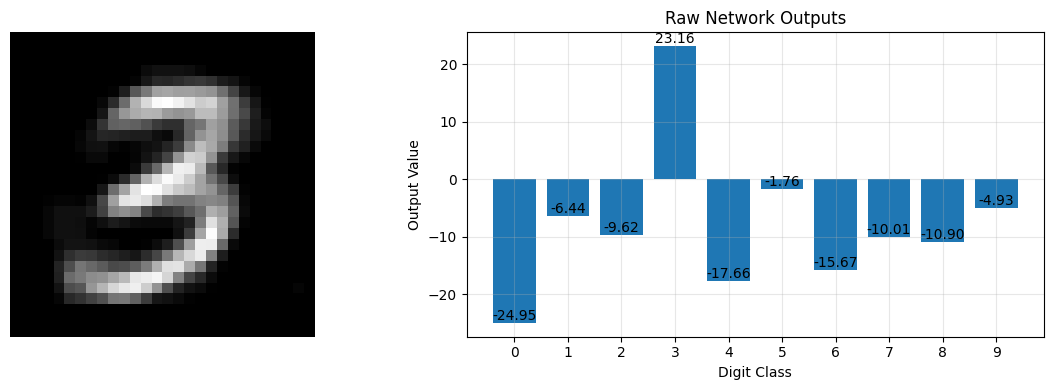

Input distance: 16.0516
Activation distance: 157.3250
Output distance: 1.7302
combined distance: 175.1068


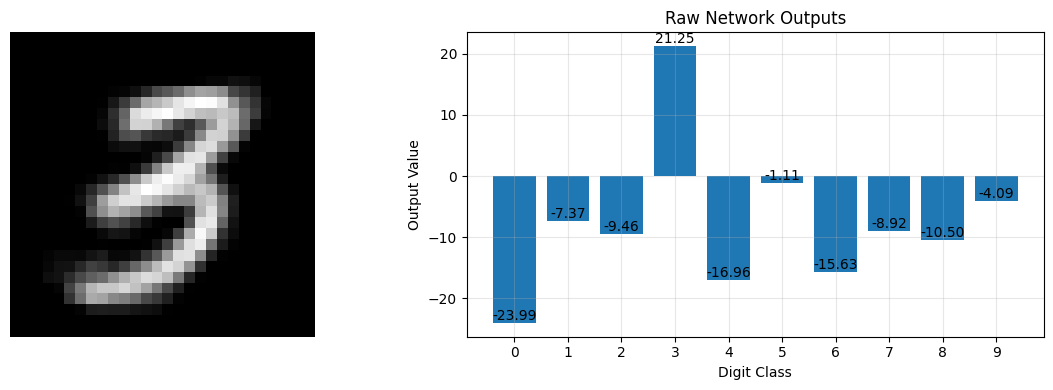

Input distance: 11.6454
Activation distance: 13.5715
Output distance: 3.0745
combined distance: 28.2915


In [7]:
# Finding KNN
indices, distances = knn_search(query=new_input, dataset=inputs, k=15, metric='euclidean')

# Finding KNN in inputs
blended_input, in_dist = blend_samples(dataset=inputs, indices=indices, distances=distances, reference=new_input)
blended_act, act_dist = blend_samples(dataset=activations, indices=indices, distances=distances, reference=new_activations)
blended_output, out_dist = blend_samples(dataset=outputs, indices=indices, distances=distances, reference=new_output)

visualize_result(image=blended_input, output=blended_output)
print(f"Input distance: {in_dist:.4f}")
print(f"Activation distance: {act_dist:.4f}")
print(f"Output distance: {out_dist:.4f}")
print(f"combined distance: {in_dist + act_dist + out_dist:.4f}")

# Finding KNN
indices, distances = knn_search(query=new_output, dataset=outputs, k=15, metric='euclidean')

# Finding KNN in inputs
blended_input, in_dist = blend_samples(dataset=inputs, indices=indices, distances=distances, reference=new_input)
blended_act, act_dist = blend_samples(dataset=activations[:,:len(new_activations)-256], indices=indices, distances=distances, reference=new_activations[:len(new_activations)-256])
blended_output, out_dist = blend_samples(dataset=outputs, indices=indices, distances=distances, reference=new_output)

visualize_result(image=blended_input, output=blended_output)
print(f"Input distance: {in_dist:.4f}")
print(f"Activation distance: {act_dist:.4f}")
print(f"Output distance: {out_dist:.4f}")
print(f"combined distance: {in_dist + act_dist + out_dist:.4f}")

# Find top 10 highest activating neurons in specific range
low_neuron = 0
n_neurons = 128
#high_indices, high_means = find_activation_extremes(activations=activations, activation_range=(0, len(new_activations)), n_neurons=n_neurons, get_highest=True)

# Finding KNN
indices, distances = knn_search(query=new_activations[len(new_activations)-384: len(new_activations)-256], dataset=activations[:,len(new_activations)-384: len(new_activations)-256], k=15, metric='euclidean')
#indices, distances = knn_search(query=new_activations[high_indices[low_neuron:n_neurons]], dataset=activations[:,high_indices[low_neuron:n_neurons]], k=15, metric='euclidean')

# Finding KNN in inputs
blended_input, in_dist = blend_samples(dataset=inputs, indices=indices, distances=distances, reference=new_input)
blended_act, act_dist = blend_samples(dataset=activations[:,len(new_activations)-384: len(new_activations)-256], indices=indices, distances=distances, reference=new_activations[len(new_activations)-384: len(new_activations)-256])
blended_output, out_dist = blend_samples(dataset=outputs, indices=indices, distances=distances, reference=new_output)

visualize_result(image=blended_input, output=blended_output)
print(f"Input distance: {in_dist:.4f}")
print(f"Activation distance: {act_dist:.4f}")
print(f"Output distance: {out_dist:.4f}")
print(f"combined distance: {in_dist + act_dist + out_dist:.4f}")

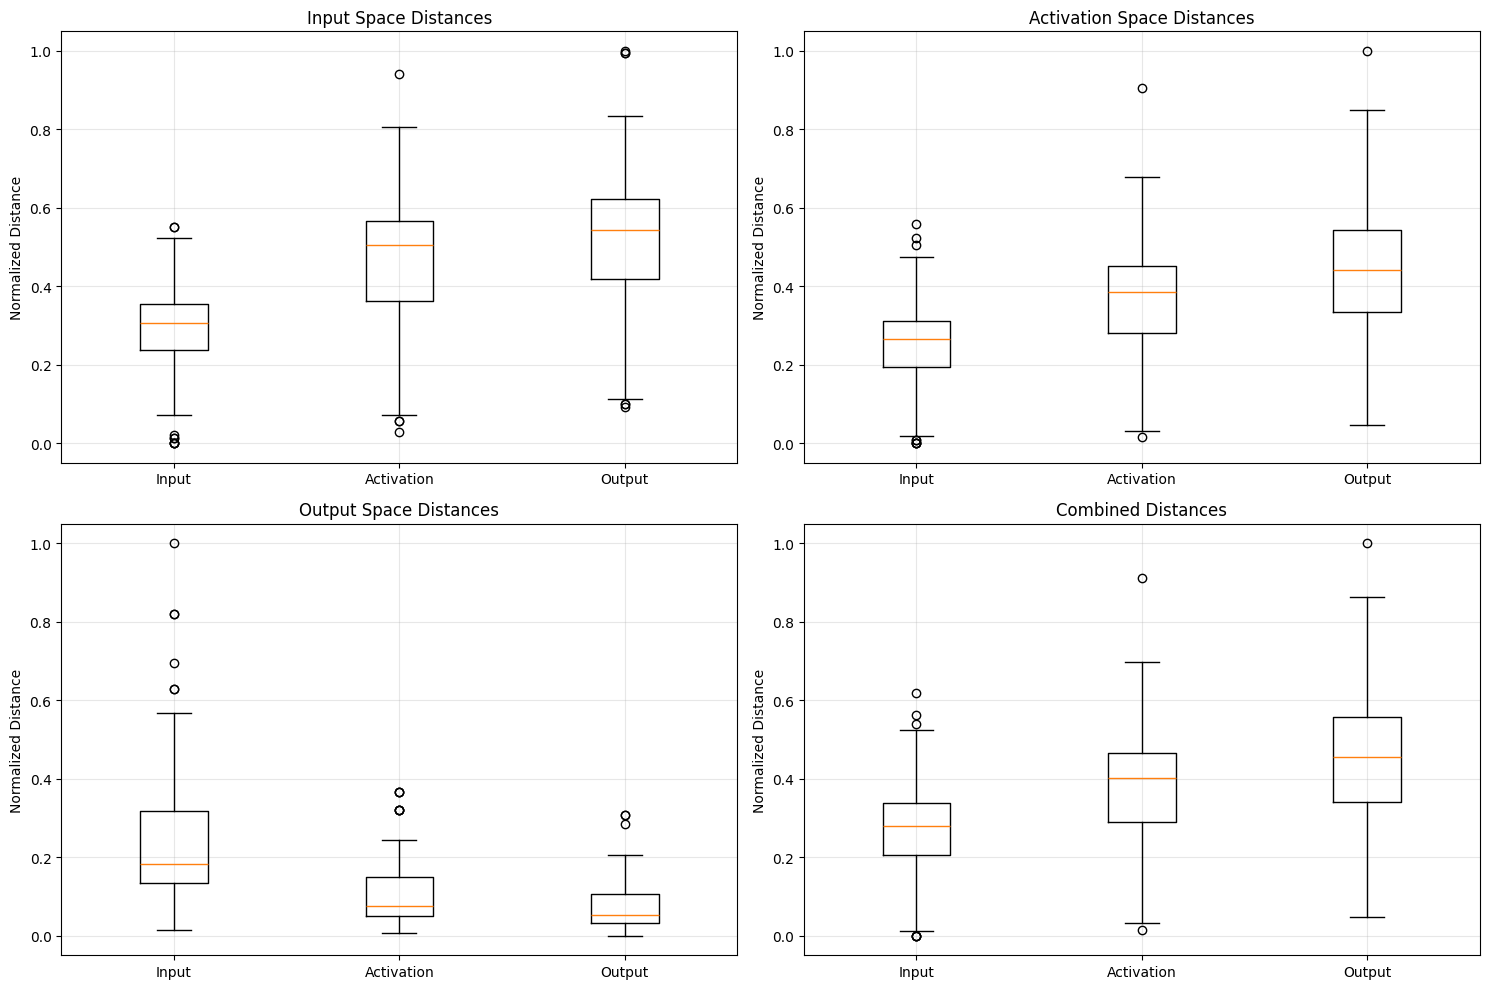


Mean distances for each approach:

input_based:
Input distance: 0.2821
Activation distance: 0.2471
Output distance: 0.2374
Combined distance: 0.2622

activation_based:
Input distance: 0.4500
Activation distance: 0.3679
Output distance: 0.0998
Combined distance: 0.3766

output_based:
Input distance: 0.5093
Activation distance: 0.4265
Output distance: 0.0712
Combined distance: 0.4329


In [26]:
# Analyze with specific activation range
results_classification = analyze_multiple_samples_embed(
    model=model,
    loader=test_loader,
    dataset_inputs=inputs,
    dataset_activations=activations,
    dataset_outputs=outputs,
    n_samples=150,
    k=15,
    device=device,
    seed=42,
    activation_range=(len(new_activations)-256, len(new_activations))
)

# Plot results
plot_distance_distributions(results_classification)

# Print mean distances
print("\nMean distances for each approach:")
for approach in ['input_based', 'activation_based', 'output_based']:
    print(f"\n{approach}:")
    print(f"Input distance: {np.mean(results_classification[approach]['input_dist']):.4f}")
    print(f"Activation distance: {np.mean(results_classification[approach]['activation_dist']):.4f}")
    print(f"Output distance: {np.mean(results_classification[approach]['output_dist']):.4f}")
    print(f"Combined distance: {np.mean(results_classification[approach]['combined_dist']):.4f}")

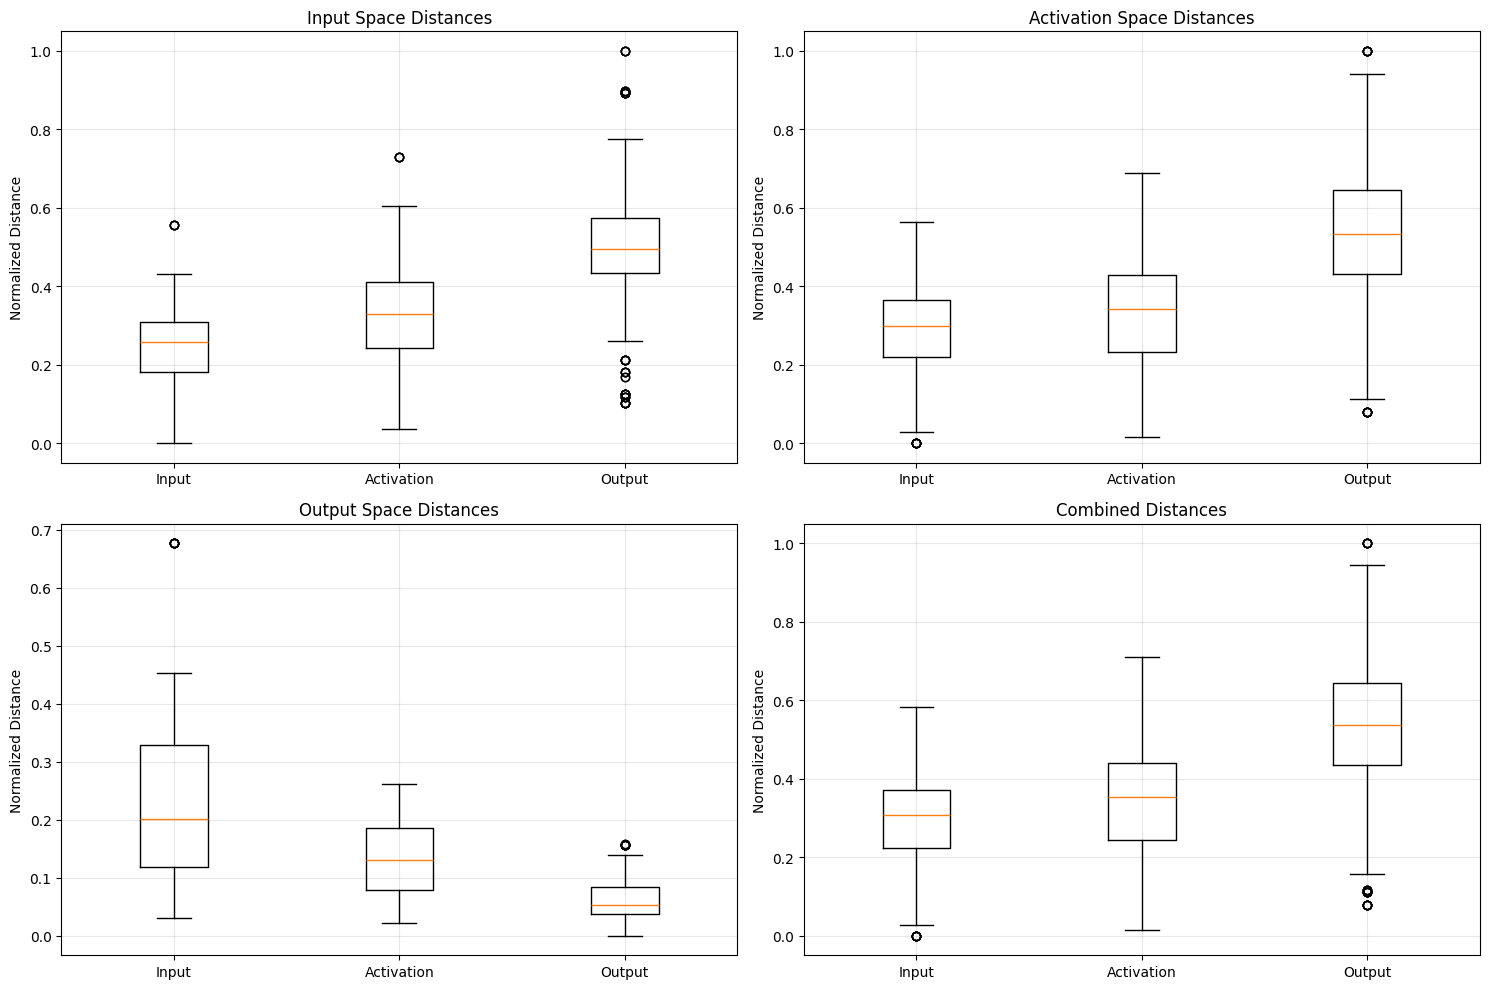


Mean distances for each approach:

input_based:
Input distance: 0.2488
Activation distance: 0.2779
Output distance: 0.2301
Combined distance: 0.2894

activation_based:
Input distance: 0.3281
Activation distance: 0.3362
Output distance: 0.1317
Combined distance: 0.3431

output_based:
Input distance: 0.4979
Activation distance: 0.5374
Output distance: 0.0634
Combined distance: 0.5382


In [11]:
# Analyze with specific activation range
results_embedding = analyze_multiple_samples_embed(
    model=model,
    loader=val_loader,
    dataset_inputs=inputs,
    dataset_activations=activations,
    dataset_outputs=outputs,
    n_samples=250,
    k=15,
    device=device,
    seed=42,
    activation_range=(len(new_activations)-384, len(new_activations)-256)
)

# Plot results
plot_distance_distributions(results_embedding)

# Print mean distances
print("\nMean distances for each approach:")
for approach in ['input_based', 'activation_based', 'output_based']:
    print(f"\n{approach}:")
    print(f"Input distance: {np.mean(results_embedding[approach]['input_dist']):.4f}")
    print(f"Activation distance: {np.mean(results_embedding[approach]['activation_dist']):.4f}")
    print(f"Output distance: {np.mean(results_embedding[approach]['output_dist']):.4f}")
    print(f"Combined distance: {np.mean(results_embedding[approach]['combined_dist']):.4f}")

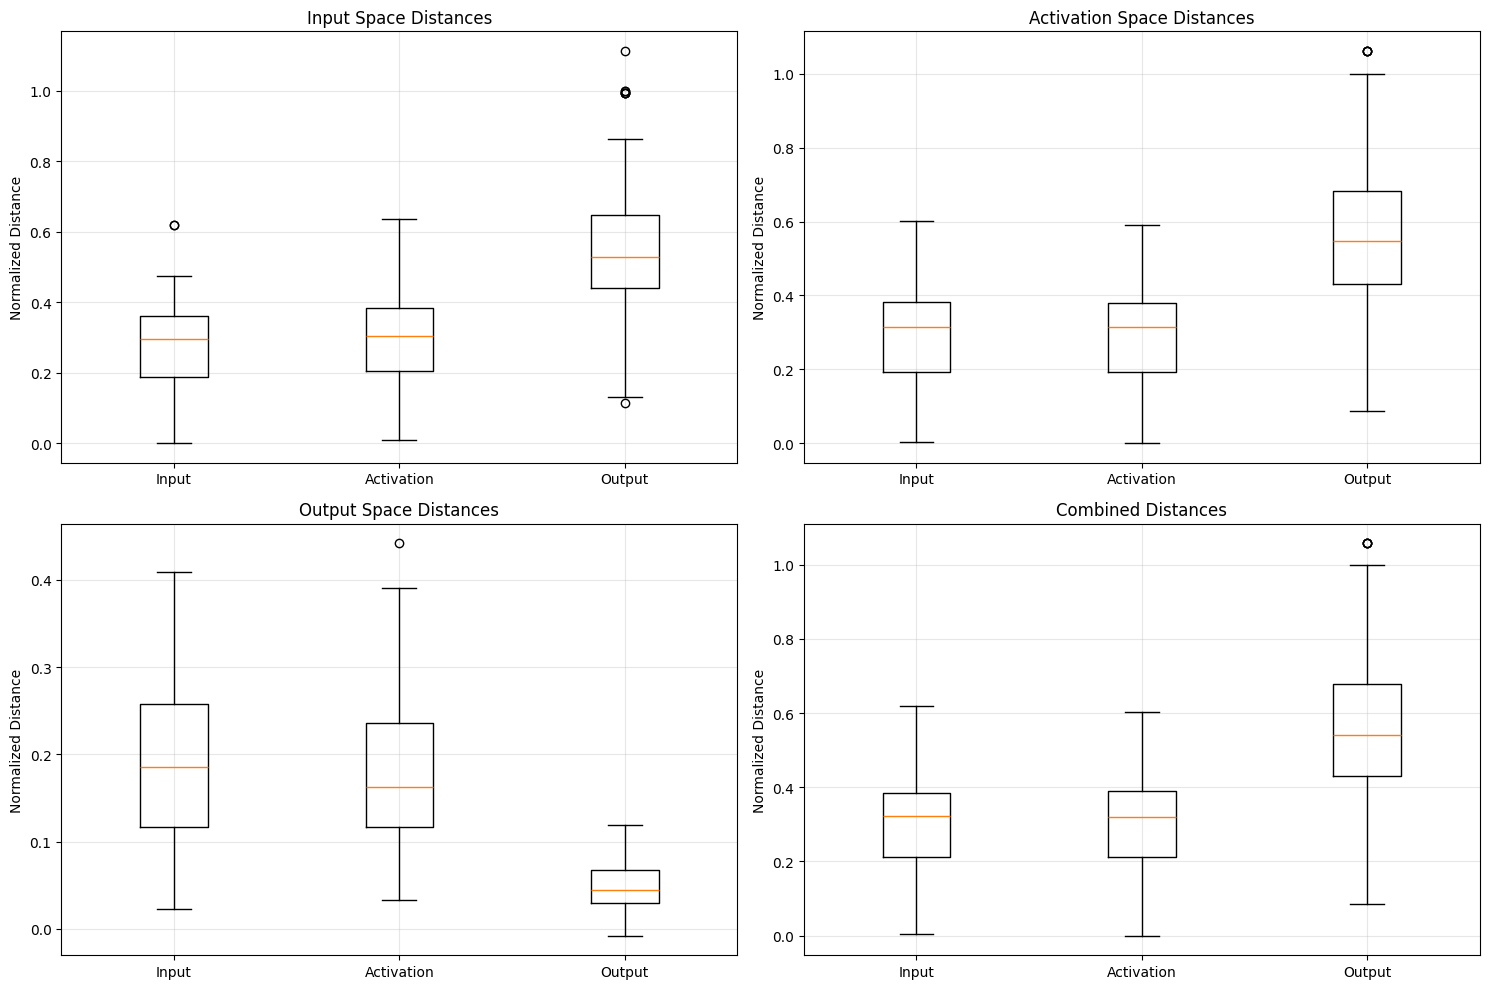


Mean distances for each approach:

input_based:
Input distance: 0.2801
Activation distance: 0.2986
Output distance: 0.1992
Combined distance: 0.3070

activation_based:
Input distance: 0.2959
Activation distance: 0.2900
Output distance: 0.1865
Combined distance: 0.2997

output_based:
Input distance: 0.5594
Activation distance: 0.5652
Output distance: 0.0498
Combined distance: 0.5638


In [13]:
# Analyze with specific activation range
results_conv = analyze_multiple_samples_embed(
    model=model,
    loader=val_loader,
    dataset_inputs=inputs,
    dataset_activations=activations,
    dataset_outputs=outputs,
    n_samples=75,
    k=15,
    device=device,
    seed=42,
    activation_range=(0, len(new_activations)-384)
)

# Plot results
plot_distance_distributions(results_conv)

# Print mean distances
print("\nMean distances for each approach:")
for approach in ['input_based', 'activation_based', 'output_based']:
    print(f"\n{approach}:")
    print(f"Input distance: {np.mean(results_conv[approach]['input_dist']):.4f}")
    print(f"Activation distance: {np.mean(results_conv[approach]['activation_dist']):.4f}")
    print(f"Output distance: {np.mean(results_conv[approach]['output_dist']):.4f}")
    print(f"Combined distance: {np.mean(results_conv[approach]['combined_dist']):.4f}")

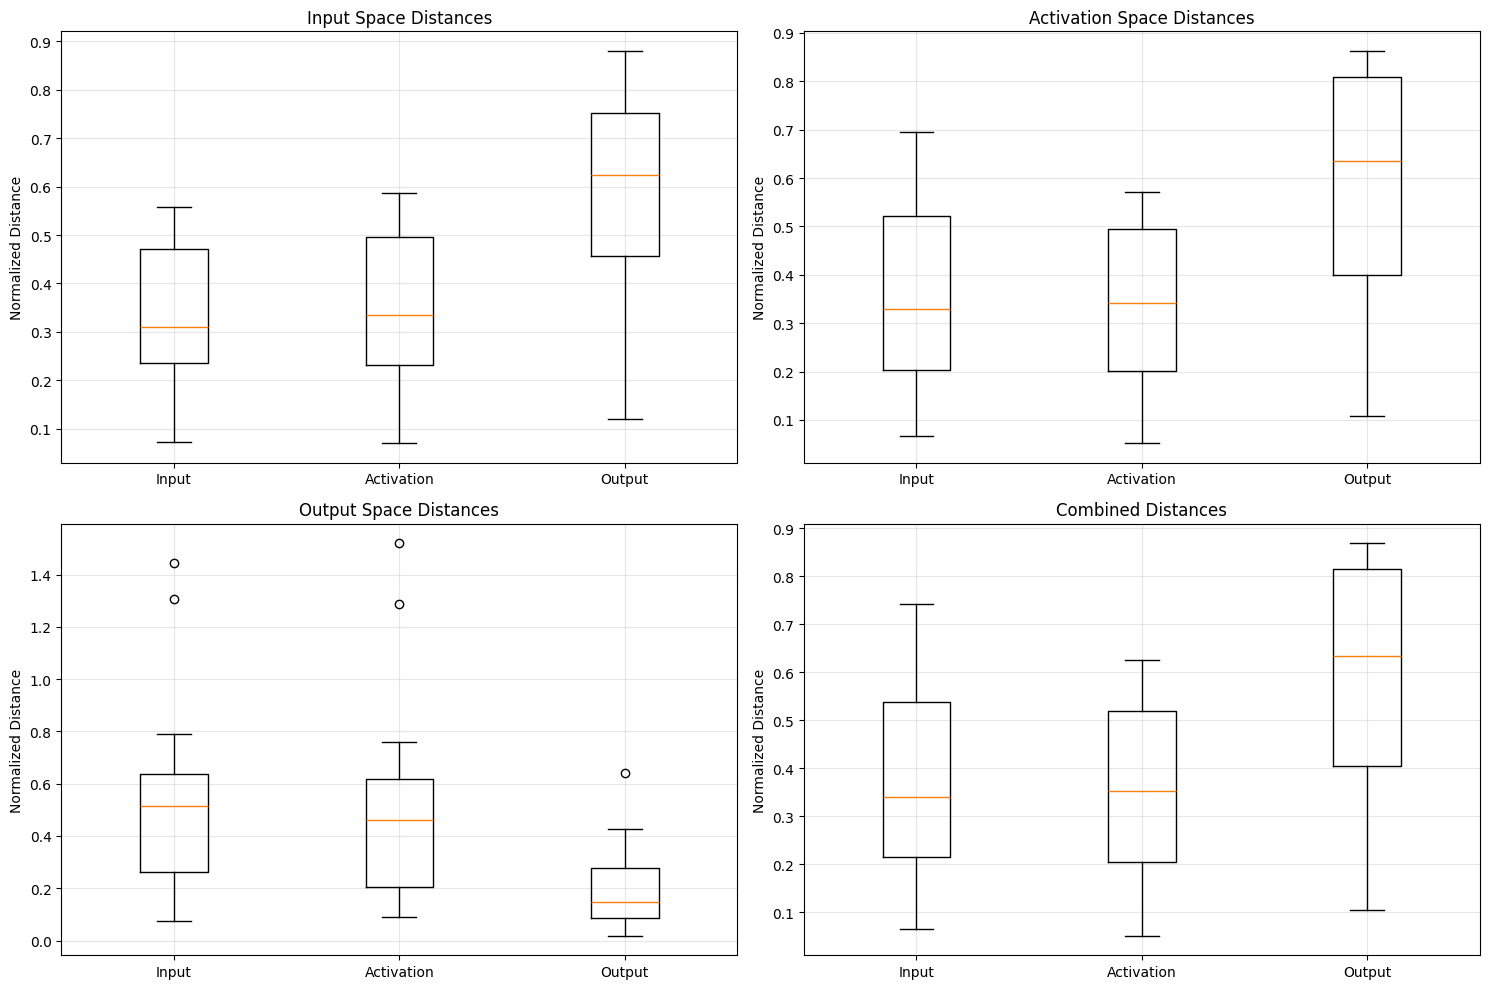


Mean distances for each approach:

input_based:
Input distance: 0.3306
Activation distance: 0.3519
Output distance: 0.5397
Combined distance: 0.3679

activation_based:
Input distance: 0.3457
Activation distance: 0.3352
Output distance: 0.5230
Combined distance: 0.3532

output_based:
Input distance: 0.5895
Activation distance: 0.5955
Output distance: 0.2136
Combined distance: 0.5988


In [27]:
# Analyze with specific activation range
results = analyze_multiple_samples_embed(
    model=model,
    loader=test_loader,
    dataset_inputs=inputs,
    dataset_activations=activations,
    dataset_outputs=outputs,
    n_samples=15,
    k=15,
    device=device,
    seed=42,
    activation_range=(0, len(new_activations))
)

# Plot results
plot_distance_distributions(results)

# Print mean distances
print("\nMean distances for each approach:")
for approach in ['input_based', 'activation_based', 'output_based']:
    print(f"\n{approach}:")
    print(f"Input distance: {np.mean(results[approach]['input_dist']):.4f}")
    print(f"Activation distance: {np.mean(results[approach]['activation_dist']):.4f}")
    print(f"Output distance: {np.mean(results[approach]['output_dist']):.4f}")
    print(f"Combined distance: {np.mean(results[approach]['combined_dist']):.4f}")

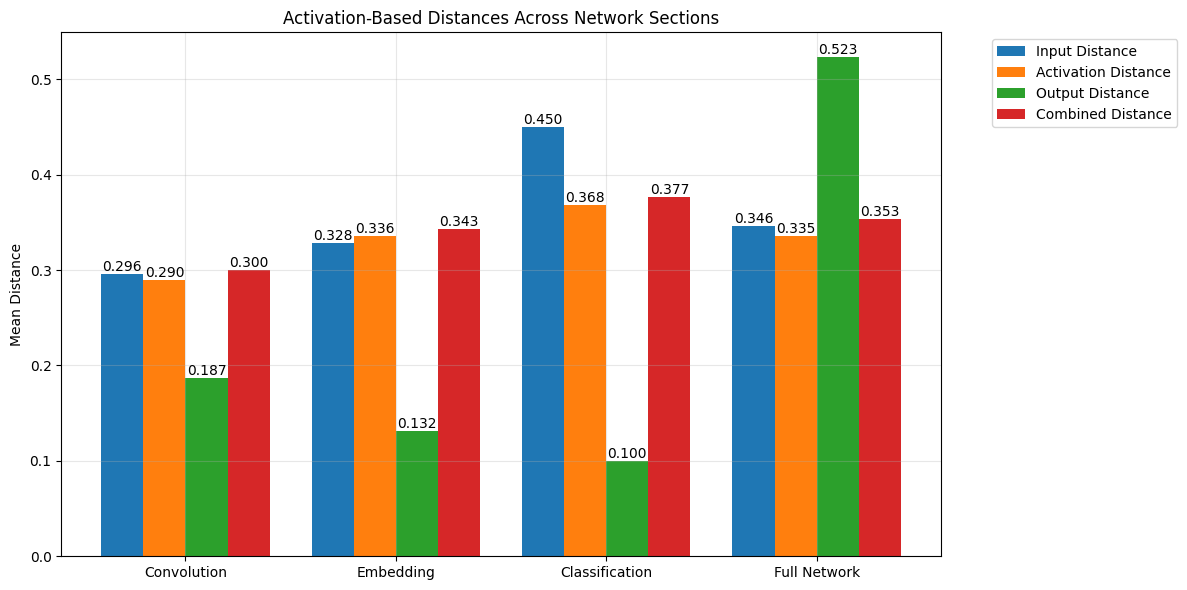


Detailed distances (activation-based approach):

Input Distance:
Convolution: 0.296
Embedding: 0.328
Classification: 0.450
Full Network: 0.346

Activation Distance:
Convolution: 0.290
Embedding: 0.336
Classification: 0.368
Full Network: 0.335

Output Distance:
Convolution: 0.187
Embedding: 0.132
Classification: 0.100
Full Network: 0.523

Combined Distance:
Convolution: 0.300
Embedding: 0.343
Classification: 0.377
Full Network: 0.353


In [28]:
compare_activation_distances_dim(
    results_conv=results_conv,          # Results for convolution layers
    results_embedding=results_embedding, # Results for embedding layer
    results_classification=results_classification,# Results for classification layer
    results_full=results,          # Results for full network
    normalize=False                      # Set to False for raw distances
)